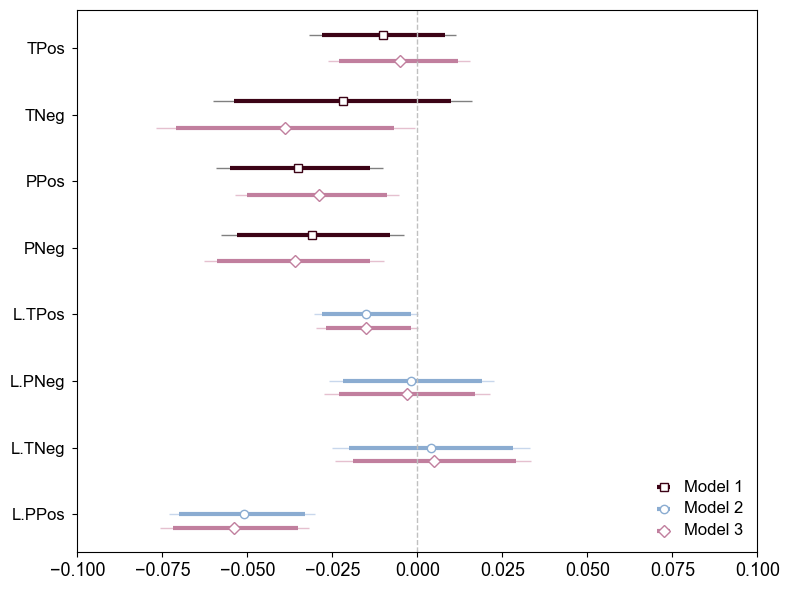

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel('Table 2 figure.xlsx')

# 变量排序
y_labels = df["variables"].unique()
y_pos = np.arange(len(y_labels))

# 偏移设置
offset = 0.2
y_shift_dict = {"Model 1": y_pos - offset, "Model 2": y_pos, "Model 3": y_pos + offset}

# 颜色配置：95% 浅色、90% 深色
colors_95 = {
    "Model 1": "grey",  # 浅色 95% CI
    "Model 2": "#C8D7EC",
    "Model 3": "#E5C0CF"
}
#A4C57
colors_90 = {
    "Model 1": "#3C0316",  # 深色 90% CI
    "Model 2": "#8BACD1",
    "Model 3": "#C17F9E"
}
markers = {"Model 1": "s", "Model 2": "o", "Model 3": "D"}

fig, ax = plt.subplots(figsize=(8, 6))

for model in df["Group"].unique():
    subset = df[df["Group"] == model]
    base_y = np.array([y_shift_dict[model][np.where(y_labels == var)[0][0]] for var in subset["variables"]])
    x = subset["Estimate"]

    # ---- 95% CI (浅色, 底层) ----
    xerr_95 = [subset["Estimate"] - subset["Lower_95_CI"], subset["Upper_95_CI"] - subset["Estimate"]]
    ax.errorbar(
        x, base_y, xerr=xerr_95,
        fmt='none',
        ecolor=colors_95[model],
        elinewidth=1,
        alpha=1.0,
        capsize=0,
        zorder=1
    )

    # ---- 90% CI (深色, 上层) ----
    xerr_90 = [subset["Estimate"] - subset["Lower_90_CI"], subset["Upper_90_CI"] - subset["Estimate"]]
    ax.errorbar(
        x, base_y, xerr=xerr_90,
        fmt=markers[model],
        color=colors_90[model],
        elinewidth=3,
        capsize=0,
        label=model,
        markerfacecolor='white',
        zorder=2
    )

# 垂直零线
ax.axvline(0, color='silver', linestyle='--', linewidth=1)

# 设置 y 轴
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=12, ha='right')
ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=12, pad=5)

# 设置 x 轴
ax.set_xlim(-0.1, 0.1)
#ax.set_xlabel("Cash holdings", fontsize=14)
#ax.set_ylabel("Variables", fontsize=14)
ax.tick_params(axis='x', labelsize=13)

# 图例
legend = ax.legend(loc='lower right', frameon=False, handletextpad=0.5, borderpad=0.5)
for text in legend.get_texts():
    text.set_fontsize(12)
legend._legend_box.sep = 10

# 避免标签被裁剪
plt.subplots_adjust(left=0.3)

# 显示并保存图像
plt.tight_layout()
plt.savefig("figure2_horizontal.png", dpi=500, bbox_inches="tight")
plt.show()

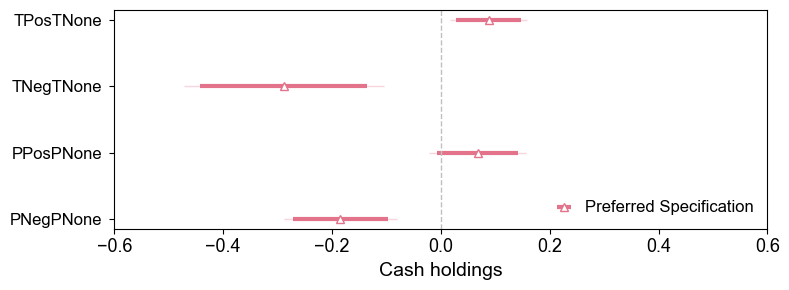

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel('Table 2-2 figure.xlsx')

# 变量排序
y_labels = df["variables"].unique()
y_pos = np.arange(len(y_labels))

# 颜色配置：95% 浅色、90% 深色
color_95 = "#F9D5DD"  # 浅色 95% CI
color_90 = "#E3738B"  # 深色 90% CI
marker_style = "^"     # 圆形标记

fig, ax = plt.subplots(figsize=(8, 3))

# 只有一个组 "Preferred Specification"
base_y = y_pos  # 不需要偏移，因为只有一个组
x = df["Estimate"]

# ---- 95% CI (浅色, 底层) ----
xerr_95 = [df["Estimate"] - df["Lower_95_CI"], df["Upper_95_CI"] - df["Estimate"]]
ax.errorbar(
    x, base_y, xerr=xerr_95,
    fmt='none',
    ecolor=color_95,
    elinewidth=1,
    alpha=1.0,
    capsize=0,
    zorder=1
)

# ---- 90% CI (深色, 上层) ----
xerr_90 = [df["Estimate"] - df["Lower_90_CI"], df["Upper_90_CI"] - df["Estimate"]]
ax.errorbar(
    x, base_y, xerr=xerr_90,
    fmt=marker_style,
    color=color_90,
    elinewidth=3,
    capsize=0,
    label="Preferred Specification",
    markerfacecolor='white',
    zorder=2
)

# 垂直零线
ax.axvline(0, color='silver', linestyle='--', linewidth=1)

# 设置 y 轴
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=12, ha='right')
ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=12, pad=5)

# 设置 x 轴
ax.set_xlim(-0.6, 0.6)
ax.set_xlabel("Cash holdings", fontsize=14)
ax.tick_params(axis='x', labelsize=13)

# 图例
legend = ax.legend(loc='lower right', frameon=False, handletextpad=0.5, borderpad=0.5)
for text in legend.get_texts():
    text.set_fontsize(12)
legend._legend_box.sep = 10

# 调整左侧边距以适应标签
plt.subplots_adjust(left=0.3)

# 显示并保存图像
plt.tight_layout()
plt.savefig("figure2_horizontal_single.png", dpi=500, bbox_inches="tight")
plt.show()

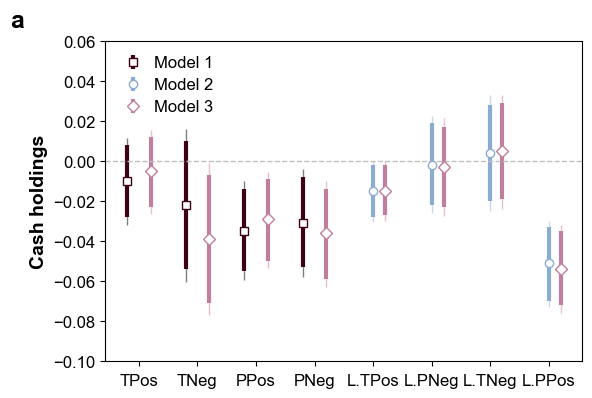

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel('Table 2 figure.xlsx')

# 变量排序
x_labels = df["variables"].unique()  # 改为x_labels
x_pos = np.arange(len(x_labels))    # 改为x_pos

# 偏移设置
offset = 0.2
x_shift_dict = {"Model 1": x_pos - offset, "Model 2": x_pos, "Model 3": x_pos + offset}  # 改为x_shift_dict

# 颜色配置：95% 浅色、90% 深色
colors_95 = {
    "Model 1": "grey",  # 浅色 95% CI
    "Model 2": "#C8D7EC",
    "Model 3": "#E5C0CF"
}
colors_90 = {
    "Model 1": "#3C0316",  # 深色 90% CI
    "Model 2": "#8BACD1",
    "Model 3": "#C17F9E"
}
markers = {"Model 1": "s", "Model 2": "o", "Model 3": "D"}

fig, ax = plt.subplots(figsize=(6, 4))  # 调整图形尺寸以适应横向标签

for model in df["Group"].unique():
    subset = df[df["Group"] == model]
    base_x = np.array([x_shift_dict[model][np.where(x_labels == var)[0][0]] for var in subset["variables"]])  # 改为base_x
    y = subset["Estimate"]  # y值现在是估计值

    # ---- 95% CI (浅色, 底层) ----
    yerr_95 = [subset["Estimate"] - subset["Lower_95_CI"], subset["Upper_95_CI"] - subset["Estimate"]]  # 改为yerr
    ax.errorbar(
        base_x, y, yerr=yerr_95,  # 交换x和y，使用yerr
        fmt='none',
        ecolor=colors_95[model],
        elinewidth=1,
        alpha=1.0,
        capsize=0,
        zorder=1
    )

    # ---- 90% CI (深色, 上层) ----
    yerr_90 = [subset["Estimate"] - subset["Lower_90_CI"], subset["Upper_90_CI"] - subset["Estimate"]]  # 改为yerr
    ax.errorbar(
        base_x, y, yerr=yerr_90,  # 交换x和y，使用yerr
        fmt=markers[model],
        color=colors_90[model],
        elinewidth=3,
        capsize=0,
        label=model,
        markerfacecolor='white',
        zorder=2
    )

# 水平零线（原来是垂直零线）
ax.axhline(0, color='silver', linestyle='--', linewidth=1)  # 改为axhline

# 设置 x 轴（原来是y轴）
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=12, rotation=0, ha='center')  # 添加旋转避免重叠
ax.tick_params(axis='x', labelsize=12, pad=5)

# 设置 y 轴（原来是x轴）
ax.set_ylim(-0.1, 0.06)
ax.set_ylabel("Cash holdings", fontsize=14, fontweight='bold')  # 改为ylabel
ax.tick_params(axis='y', labelsize=12)

# 添加文字（新增部分）
ax.text(
    x=-0.2, y=1.1,  # 更靠近顶部
    s="a",  # 替换为你的文字
    transform=ax.transAxes,
    fontsize=18,  
    fontweight='bold',  # 关键加粗参数
    color='black',  # 确保黑色文字
    verticalalignment='top',
    linespacing=1.5  # 行间距（多行文字时）
)

# 图例
legend = ax.legend(loc='upper left', frameon=False, handletextpad=0.5, borderpad=0.5)  # 调整图例位置
for text in legend.get_texts():
    text.set_fontsize(12)
legend._legend_box.sep = 10

# 调整底部边距以适应标签
plt.subplots_adjust(bottom=0.3)  # 改为调整底部

# 显示并保存图像
plt.tight_layout()
plt.savefig("figure2_vertical.png", dpi=500, bbox_inches="tight")  # 更改文件名
plt.show()

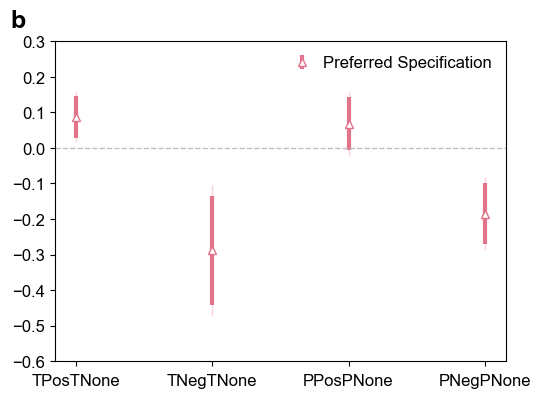

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel('Table 2-2 figure.xlsx')

# 变量排序
x_labels = df["variables"].unique()  # 改为x_labels
x_pos = np.arange(len(x_labels))    # 改为x_pos

# 颜色配置：95% 浅色、90% 深色
color_95 = "#F9D5DD"  # 浅色 95% CI
color_90 = "#E3738B"  # 深色 90% CI
marker_style = "^"     # 圆形标记

fig, ax = plt.subplots(figsize=(5.5, 4))  # 调整为更宽的图形

# 只有一个组 "Preferred Specification"
base_x = x_pos  # 不需要偏移，因为只有一个组
y = df["Estimate"]  # y值现在是估计值

# ---- 95% CI (浅色, 底层) ----
yerr_95 = [df["Estimate"] - df["Lower_95_CI"], df["Upper_95_CI"] - df["Estimate"]]  # 改为yerr
ax.errorbar(
    base_x, y, yerr=yerr_95,  # 交换x和y，使用yerr
    fmt='none',
    ecolor=color_95,
    elinewidth=1,
    alpha=1.0,
    capsize=0,
    zorder=1
)

# ---- 90% CI (深色, 上层) ----
yerr_90 = [df["Estimate"] - df["Lower_90_CI"], df["Upper_90_CI"] - df["Estimate"]]  # 改为yerr
ax.errorbar(
    base_x, y, yerr=yerr_90,  # 交换x和y，使用yerr
    fmt=marker_style,
    color=color_90,
    elinewidth=3,
    capsize=0,
    label="Preferred Specification",
    markerfacecolor='white',
    zorder=2
)

# 水平零线（原来是垂直零线）
ax.axhline(0, color='silver', linestyle='--', linewidth=1)  # 改为axhline

# 设置 x 轴（原来是y轴）
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=12, rotation=0, ha='center')  # 添加旋转避免重叠
ax.tick_params(axis='x', labelsize=12, pad=5)

# 设置 y 轴（原来是x轴）
ax.set_ylim(-0.6, 0.3)
#ax.set_ylabel("Cash holdings", fontsize=14)  # 改为ylabel
ax.tick_params(axis='y', labelsize=12)

# 添加文字（新增部分）
ax.text(
    x=-0.1, y=1.1,  # 更靠近顶部
    s="b",  # 替换为你的文字
    transform=ax.transAxes,
    fontsize=18,  # 建议10-12
    fontweight='bold',  # 关键加粗参数
    color='black',  # 确保黑色文字
    verticalalignment='top',
    linespacing=1.5  # 行间距（多行文字时）
)


# 图例
legend = ax.legend(loc='upper right', frameon=False, handletextpad=0.5, borderpad=0.5)  # 调整图例位置
for text in legend.get_texts():
    text.set_fontsize(12)
legend._legend_box.sep = 10

# 调整底部边距以适应标签
plt.subplots_adjust(bottom=0.3)  # 改为调整底部

# 显示并保存图像
plt.tight_layout()
plt.savefig("figure2_vertical_single.png", dpi=500, bbox_inches="tight")  # 更改文件名
plt.show()

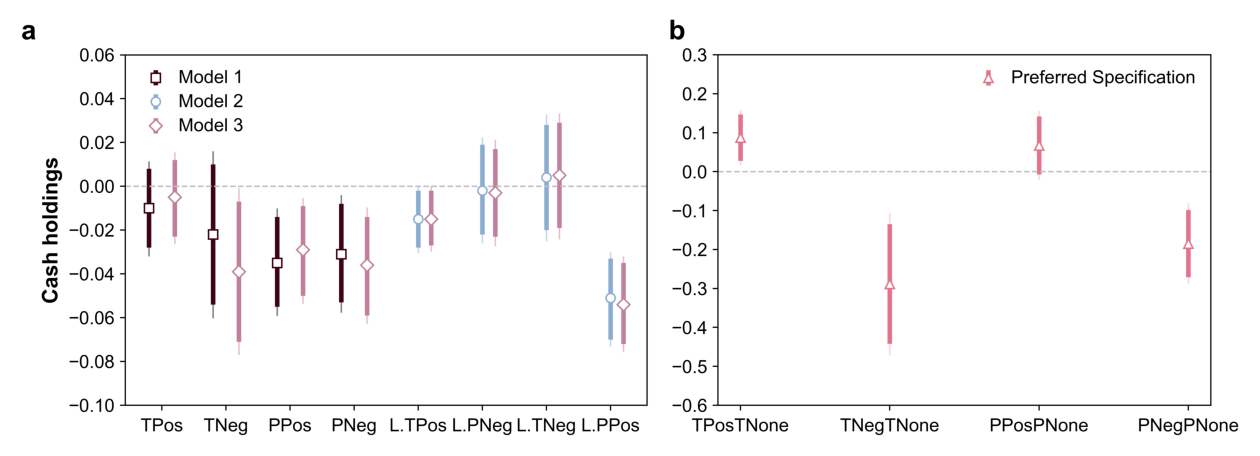

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 两张图片路径
image1_path = "figure2_vertical.png"
image2_path = "figure2_vertical_single.png"

# 打开两张图片
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# 获取两张图片的尺寸
width1, height1 = image1.size
width2, height2 = image2.size

# 计算合并后图片的总宽度和高度（取最大高度）
total_width = width1 + width2
max_height = max(height1, height2)

# 创建新画布（白色背景）
merged_image = Image.new('RGB', (total_width, max_height), color=(255, 255, 255))

# 将两张图片粘贴到新画布上
merged_image.paste(image1, (0, 0))  # 第一张放在左边
merged_image.paste(image2, (width1, int((max_height - height2)/2)))  # 第二张放在右边并垂直居中

# 保存合并后的图片
merged_image.save("merged_figures_horizontal.png", dpi=(500, 500), quality=95)

# 显示合并结果（可选）
plt.figure(figsize=(16, 8))
plt.imshow(np.array(merged_image))
plt.axis('off')
plt.show()